In [1]:
"""
Topic:        Project 2
Subject:      Carbon Emissions
Date:         xx/xx/xxxx
Name:         Leo Knauth
Worked with:  --


""";

In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import adfuller

import warnings
import itertools

from sklearn.linear_model import LinearRegression

from pandas.tools.plotting import autocorrelation_plot

import re

import sys
import os

In [3]:
df_gdp = pd.read_pickle("gdp_per_capita.pkl")

In [4]:
df_gdp.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
4,Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,...,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0


In [5]:
df_co2 = pd.read_pickle('co2_per_capita.pkl')

In [6]:
df_co2.head()

,country,1751,1755,1762,1763,1764,1765,1766,1767,1768,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022704,0.027472,0.036780,0.047090,0.068312,0.131602,0.213325,0.262174,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.382066,1.332966,1.353789,1.224310,1.279420,1.297753,1.215055,1.336544,NaN,NaN
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.899236,2.762220,3.257010,3.113135,3.312875,3.328945,3.564361,3.480977,3.562504,3.785654


In [7]:
df_gdp.columns

Index(['country', '1800', '1801', '1802', '1803', '1804', '1805', '1806',
       '1807', '1808',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=217)

In [8]:
select_years = list(map( lambda x : str(x), range(1962, 2013)))
select_years;

In [9]:
df_gdp_years = df_gdp[['country'] + select_years]

In [10]:
df_gdp_years.head()

,country,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1188.0,1185.0,1182.0,1182.0,1168.0,1173.0,1187.0,1178.0,1174.0,...,1097.0,1067.0,1146.0,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,2832.0,2926.0,3023.0,3129.0,3242.0,3359.0,3475.0,3587.0,3712.0,...,6274.0,6672.0,7075.0,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0
4,Algeria,4481.0,5551.0,5693.0,5916.0,5478.0,5811.0,6319.0,6747.0,7227.0,...,11251.0,11575.0,12077.0,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0


In [11]:
df_gdp_clean = df_gdp_years.dropna().reset_index()

In [12]:
df_gdp_clean.drop('index', 1, inplace = True)

In [185]:
df_gdp_clean;

In [14]:
df_co2_years = df_co2[['country'] + select_years]

In [15]:
df_co2_years.head(200);

In [16]:
df_co2_clean = df_co2_years.dropna().reset_index()

In [17]:
df_co2_clean.drop('index', 1, inplace = True)

In [18]:
# df_co2_clean.loc['mean'] = df_co2_clean.mean()

In [184]:
df_co2_clean;

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


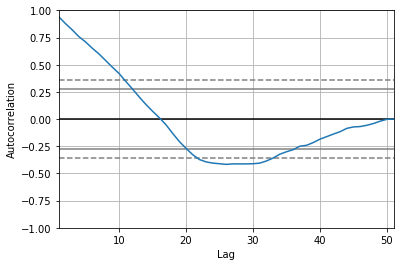

In [20]:
# autocorrelation for a sample country

autocorrelation_plot(df_co2_clean.iloc[17][1:])

In [21]:
array = np.array(df_co2_clean.iloc[17][1:])
series = df_co2_clean.iloc[17][1:]

In [22]:
model = ARIMA(array, order=(5,1,0))

In [23]:
model_fit = model.fit(disp=0)
print(model_fit.summary())

/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   50
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -25.676
Method:                       css-mle   S.D. of innovations              0.404
Date:                Tue, 22 Jan 2019   AIC                             65.352
Time:                        13:39:18   BIC                             78.736
Sample:                             1   HQIC                            70.449
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0610      0.059     -1.038      0.305      -0.176       0.054
ar.L1.D.y     -0.0434      0.145     -0.299      0.766      -0.327       0.241
ar.L2.D.y     -0.0336      0.145     -0.232      0.8

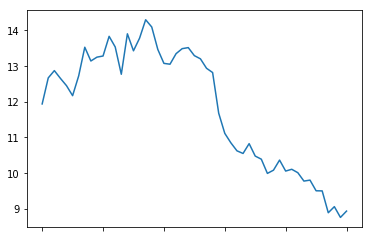

In [24]:
series.plot()

In [181]:
def fuller_test(series):
    values = series.values
    result = adfuller(values)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

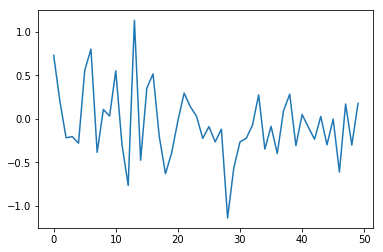

In [26]:
# difference for detrending
diff = list()
for i in range(1, len(values)):
    value = values[i] - values[i - 1]
    diff.append(value)
plt.plot(diff)

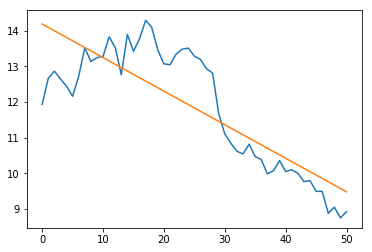

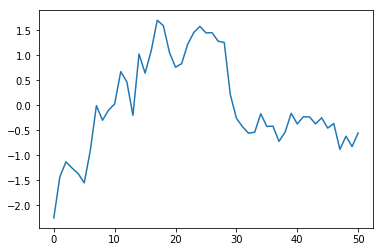

In [27]:
# detrending with linear regression

X = [i for i in range(0, len(series))]
X = np.reshape(X, (len(X), 1))
y = series.values

# print(y)

model = LinearRegression()
model.fit(X, y)
# calculate trend

trend = model.predict(X)
# plot trend
plt.plot(y)
plt.plot(trend)
plt.show()
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(series))]
# plot detrended
plt.plot(detrended)
plt.show()

In [28]:
'''
In order to use Arima I must first transpose my dataframe and set a dateIndex.

Do not know how to rename the index. 
''';

In [183]:
df_co2_transpose = df_co2_clean.transpose()
df_co2_transpose.columns = df_co2_transpose.iloc[0]
df_co2_transpose.drop('country',0, inplace = True)
# df_co2_transpose = df_co2_transpose.rename(index = str, columns={"country": "year"}) 
df_co2_transpose = df_co2_transpose.apply(pd.to_numeric)


# df_co2_transpose.index.names = ['year']
# df_co2_transpose = df_co2_transpose.reindex(df_co2_transpose.index.rename(['year']))
df_co2_transpose;
# df_co2_transpose.info()

In [30]:
def find_best_params():
    '''
    attempting to find the best
    '''
    
    
    # creating the  parameters as tuples
    p = d = q = range(0, 6)
    pdq = list(itertools.product(p, d, q))
    
    #
    for param in pdq:
        for param in pdq:
            model = sm.tsa.arima_model.ARIMA(param, )
    

In [31]:
find_best_params()

AttributeError: module 'statsmodels.tsa.api' has no attribute 'arima_model'

In [32]:
'''
filter df_gdp_clean by countries that we also have CO2 data for
'''
df_gdp_com = df_gdp_clean[df_gdp_clean['country'].isin(df_co2_clean['country'])].reset_index().drop('index', 1)

In [33]:
# df_co2_clean[df_co2_clean['country'].isin(df_gdp_clean['country'])]

In [34]:
# df_gdp_com
df_gdp_transpose = df_gdp_com.transpose()
df_gdp_transpose.columns = df_gdp_transpose.iloc[0]
df_gdp_transpose.drop('country',0, inplace = True)
# df_gdp_com = df_gdp_transpose.rename(index = str, columns={"country": "year"}) 
df_gdp_transpose = df_gdp_transpose.apply(pd.to_numeric)


# df_gdp_transpose.index.names = ['year']
# df_gdp_transpose = df_gdp_transpose.reindex(df_gdp_com.index.rename(['year']))
df_gdp_transpose
# df_gdp_com.info()

country,Algeria,Argentina,Australia,Austria,Bangladesh,Belgium,Brazil,Bulgaria,Canada,Chile,...,Switzerland,Taiwan,Thailand,Trinidad and Tobago,Turkey,United Arab Emirates,United Kingdom,United States,Venezuela,Vietnam
1962,4481.0,7950.0,14742.0,12800.0,1062.0,13689.0,4823.0,5506.0,15276.0,6293.0,...,29137.0,2808.0,1593.0,8929.0,4849.0,2264.0,13897.0,18966.0,12571.0,1272.0
1963,5551.0,7600.0,15357.0,13225.0,1147.0,14163.0,4697.0,5711.0,15752.0,6538.0,...,29877.0,3095.0,1667.0,9229.0,5188.0,2954.0,14393.0,19497.0,12468.0,1267.0
1964,5693.0,8227.0,16098.0,13915.0,1138.0,14995.0,4707.0,6110.0,16464.0,6537.0,...,30886.0,3407.0,1725.0,9362.0,5296.0,5021.0,15067.0,20338.0,13789.0,1285.0
1965,5916.0,8818.0,16601.0,14213.0,1177.0,15360.0,4671.0,6432.0,17243.0,6451.0,...,31531.0,3571.0,1804.0,9699.0,5309.0,8534.0,15292.0,21361.0,14056.0,1257.0
1966,5478.0,8709.0,16756.0,14898.0,1169.0,15721.0,4836.0,6891.0,18022.0,7026.0,...,31983.0,3836.0,1945.0,10002.0,5906.0,14505.0,15494.0,22495.0,13807.0,1232.0
1967,5811.0,8782.0,17570.0,15228.0,1122.0,16225.0,4888.0,7216.0,18240.0,7114.0,...,32566.0,4146.0,2044.0,10152.0,6020.0,24652.0,15777.0,22803.0,14225.0,1047.0
1968,6319.0,9003.0,18261.0,15814.0,1202.0,16816.0,5215.0,7296.0,18900.0,7231.0,...,33324.0,4461.0,2145.0,10669.0,6295.0,29634.0,16357.0,23647.0,14764.0,1002.0
1969,6747.0,9610.0,18949.0,16743.0,1195.0,17868.0,5550.0,7592.0,19614.0,7364.0,...,34719.0,4772.0,2246.0,10988.0,6470.0,35623.0,16616.0,24147.0,14753.0,1059.0
1970,7227.0,9951.0,19719.0,17865.0,1226.0,18903.0,5930.0,7971.0,19842.0,7382.0,...,36582.0,5144.0,2323.0,11495.0,6740.0,42822.0,16933.0,23908.0,15390.0,1053.0
1971,6427.0,10167.0,20176.0,18698.0,1142.0,19548.0,6463.0,8186.0,20688.0,7906.0,...,37621.0,5758.0,2365.0,11558.0,6765.0,41464.0,17207.0,24350.0,15549.0,1082.0


In [35]:
'''
find the betas of gdp/c and co2/c per year for all countries
''';

In [86]:
# betas = {}
df_ratios = df_gdp_transpose.copy()

for year in select_years:
    
    for country in df_gdp_transpose.columns:
#         print(year)
#         print(country)
        year1 = str(year).strip()
        df_ratios.loc[year1][country] = df_co2_transpose.loc[year1][country] / df_gdp_transpose.loc[year1][country]
        
        


In [88]:
df_ratios

country,Algeria,Argentina,Australia,Austria,Bangladesh,Belgium,Brazil,Bulgaria,Canada,Chile,...,Switzerland,Taiwan,Thailand,Trinidad and Tobago,Turkey,United Arab Emirates,United Kingdom,United States,Venezuela,Vietnam
1962,0.000113,0.000317,0.000602,0.000372,0.000045,0.000773,0.000144,0.000697,0.000728,0.000330,...,0.000151,0.000424,0.000109,0.000935,0.000151,0.000074,0.000802,0.000820,0.000528,0.000199
1963,0.000086,0.000305,0.000603,0.000390,0.000046,0.000800,0.000149,0.000746,0.000707,0.000322,...,0.000173,0.000398,0.000112,0.000162,0.000144,0.000061,0.000782,0.000822,0.000533,0.000190
1964,0.000085,0.000308,0.000609,0.000388,0.000047,0.000737,0.000147,0.000862,0.000748,0.000317,...,0.000159,0.000393,0.000141,0.000459,0.000160,0.000027,0.000748,0.000812,0.000469,0.000236
1965,0.000094,0.000299,0.000641,0.000370,0.000046,0.000727,0.000143,0.000878,0.000743,0.000318,...,0.000165,0.000386,0.000130,0.000599,0.000162,0.000018,0.000749,0.000796,0.000477,0.000263
1966,0.000126,0.000320,0.000618,0.000360,0.000046,0.000706,0.000153,0.000856,0.000717,0.000302,...,0.000167,0.000381,0.000149,0.000447,0.000164,0.000011,0.000730,0.000785,0.000441,0.000381
1967,0.000116,0.000325,0.000619,0.000357,0.000049,0.000696,0.000152,0.000918,0.000754,0.000300,...,0.000167,0.000389,0.000176,0.000495,0.000167,0.000222,0.000683,0.000795,0.000478,0.000524
1968,0.000111,0.000330,0.000605,0.000362,0.000051,0.000738,0.000162,0.000973,0.000767,0.000318,...,0.000179,0.000388,0.000229,0.000403,0.000170,0.000232,0.000672,0.000788,0.000444,0.000550
1969,0.000125,0.000341,0.000603,0.000359,0.000048,0.000721,0.000162,0.001036,0.000734,0.000326,...,0.000179,0.000386,0.000181,0.000372,0.000173,0.002862,0.000683,0.000803,0.000453,0.000582
1970,0.000152,0.000347,0.000588,0.000380,0.000046,0.000690,0.000165,0.000905,0.000792,0.000349,...,0.000179,0.000383,0.000179,0.000809,0.000178,0.001536,0.000693,0.000864,0.000454,0.000596
1971,0.000205,0.000359,0.000583,0.000372,0.000047,0.000643,0.000161,0.000920,0.000773,0.000351,...,0.000179,0.000367,0.000214,0.000717,0.000195,0.001875,0.000688,0.000846,0.000364,0.000493


In [136]:
df_ratios_train = df_ratios.loc['1962':'2007']

In [137]:
df_ratios_train

country,Algeria,Argentina,Australia,Austria,Bangladesh,Belgium,Brazil,Bulgaria,Canada,Chile,...,Switzerland,Taiwan,Thailand,Trinidad and Tobago,Turkey,United Arab Emirates,United Kingdom,United States,Venezuela,Vietnam
1962,0.000113,0.000317,0.000602,0.000372,0.000045,0.000773,0.000144,0.000697,0.000728,0.000330,...,0.000151,0.000424,0.000109,0.000935,0.000151,0.000074,0.000802,0.000820,0.000528,0.000199
1963,0.000086,0.000305,0.000603,0.000390,0.000046,0.000800,0.000149,0.000746,0.000707,0.000322,...,0.000173,0.000398,0.000112,0.000162,0.000144,0.000061,0.000782,0.000822,0.000533,0.000190
1964,0.000085,0.000308,0.000609,0.000388,0.000047,0.000737,0.000147,0.000862,0.000748,0.000317,...,0.000159,0.000393,0.000141,0.000459,0.000160,0.000027,0.000748,0.000812,0.000469,0.000236
1965,0.000094,0.000299,0.000641,0.000370,0.000046,0.000727,0.000143,0.000878,0.000743,0.000318,...,0.000165,0.000386,0.000130,0.000599,0.000162,0.000018,0.000749,0.000796,0.000477,0.000263
1966,0.000126,0.000320,0.000618,0.000360,0.000046,0.000706,0.000153,0.000856,0.000717,0.000302,...,0.000167,0.000381,0.000149,0.000447,0.000164,0.000011,0.000730,0.000785,0.000441,0.000381
1967,0.000116,0.000325,0.000619,0.000357,0.000049,0.000696,0.000152,0.000918,0.000754,0.000300,...,0.000167,0.000389,0.000176,0.000495,0.000167,0.000222,0.000683,0.000795,0.000478,0.000524
1968,0.000111,0.000330,0.000605,0.000362,0.000051,0.000738,0.000162,0.000973,0.000767,0.000318,...,0.000179,0.000388,0.000229,0.000403,0.000170,0.000232,0.000672,0.000788,0.000444,0.000550
1969,0.000125,0.000341,0.000603,0.000359,0.000048,0.000721,0.000162,0.001036,0.000734,0.000326,...,0.000179,0.000386,0.000181,0.000372,0.000173,0.002862,0.000683,0.000803,0.000453,0.000582
1970,0.000152,0.000347,0.000588,0.000380,0.000046,0.000690,0.000165,0.000905,0.000792,0.000349,...,0.000179,0.000383,0.000179,0.000809,0.000178,0.001536,0.000693,0.000864,0.000454,0.000596
1971,0.000205,0.000359,0.000583,0.000372,0.000047,0.000643,0.000161,0.000920,0.000773,0.000351,...,0.000179,0.000367,0.000214,0.000717,0.000195,0.001875,0.000688,0.000846,0.000364,0.000493


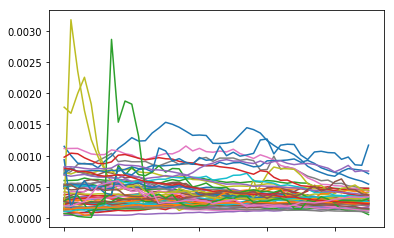

In [112]:
for country in df_ratios_train.columns:

    series = df_ratios_train[country]
    series.plot()

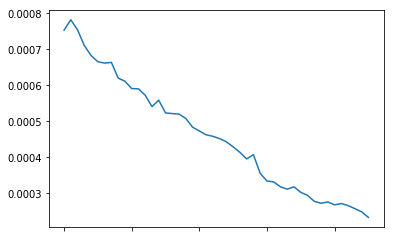

In [131]:
series = df_ratios_train['Germany']
# series = df_ratios['Germany']
series.plot()

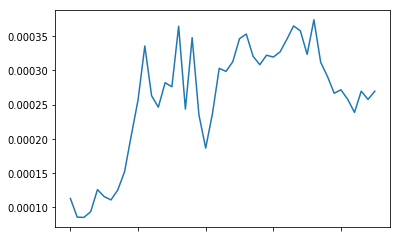

In [114]:
series = df_ratios_train['Algeria']
series.plot()

In [138]:
'''
running ARIMA on all the countries
''';

In [127]:
for country in df_ratios_train.columns:
    array = np.array(df_ratios_train[country])
    model = ARIMA(array, order=(2,1,0))
    model_fit = model.fit(disp=0)
    print('\n\n', country)
    print(model_fit.summary())



 Algeria
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   45
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 389.289
Method:                       css-mle   S.D. of innovations              0.000
Date:                Tue, 22 Jan 2019   AIC                           -770.577
Time:                        15:43:48   BIC                           -763.351
Sample:                             1   HQIC                          -767.883
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.591e-06   4.84e-06      0.741      0.463    -5.9e-06    1.31e-05
ar.L1.D.y     -0.3221      0.148     -2.174      0.035      -0.613      -0.032
ar.L2.D.y      0.0138      0.147      0.0

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)




 Austria
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   45
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 439.109
Method:                       css-mle   S.D. of innovations              0.000
Date:                Tue, 22 Jan 2019   AIC                           -870.218
Time:                        15:43:49   BIC                           -862.991
Sample:                             1   HQIC                          -867.524
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.083e-06   1.25e-06     -3.265      0.002   -6.53e-06   -1.63e-06
ar.L1.D.y     -0.3952      0.147     -2.693      0.010      -0.683      -0.108
ar.L2.D.y     -0.2902      0.145     -2.0

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)




 Brazil
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   45
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 485.984
Method:                       css-mle   S.D. of innovations              0.000
Date:                Tue, 22 Jan 2019   AIC                           -963.969
Time:                        15:43:49   BIC                           -956.742
Sample:                             1   HQIC                          -961.275
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.781e-08   9.22e-07     -0.019      0.985   -1.82e-06    1.79e-06
ar.L1.D.y      0.1663      0.149      1.118      0.270      -0.125       0.458
ar.L2.D.y      0.0405      0.150      0.27

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)




 Canada
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   45
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 418.224
Method:                       css-mle   S.D. of innovations              0.000
Date:                Tue, 22 Jan 2019   AIC                           -828.447
Time:                        15:43:49   BIC                           -821.220
Sample:                             1   HQIC                          -825.753
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.032e-06   2.98e-06     -2.362      0.023   -1.29e-05    -1.2e-06
ar.L1.D.y     -0.1315      0.148     -0.890      0.379      -0.421       0.158
ar.L2.D.y      0.0144      0.155      0.09

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)




 Egypt
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   45
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 419.854
Method:                       css-mle   S.D. of innovations              0.000
Date:                Tue, 22 Jan 2019   AIC                           -831.708
Time:                        15:43:50   BIC                           -824.481
Sample:                             1   HQIC                          -829.014
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.019e-07   2.86e-06     -0.316      0.754    -6.5e-06     4.7e-06
ar.L1.D.y     -0.2210      0.151     -1.463      0.151      -0.517       0.075
ar.L2.D.y      0.1002      0.150      0.669

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)




 France
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   45
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 431.019
Method:                       css-mle   S.D. of innovations              0.000
Date:                Tue, 22 Jan 2019   AIC                           -854.038
Time:                        15:43:50   BIC                           -846.811
Sample:                             1   HQIC                          -851.344
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.598e-06   2.22e-06     -3.425      0.001   -1.19e-05   -3.25e-06
ar.L1.D.y     -0.1479      0.157     -0.945      0.350      -0.455       0.159
ar.L2.D.y      0.0179      0.155      0.11

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)




 India
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   45
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 436.012
Method:                       css-mle   S.D. of innovations              0.000
Date:                Tue, 22 Jan 2019   AIC                           -864.024
Time:                        15:43:50   BIC                           -856.798
Sample:                             1   HQIC                          -861.330
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.378e-06   2.12e-06      0.651      0.519   -2.77e-06    5.53e-06
ar.L1.D.y     -0.1787      0.147     -1.215      0.231      -0.467       0.110
ar.L2.D.y      0.1223      0.153      0.801

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)




 Iran
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   45
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 410.697
Method:                       css-mle   S.D. of innovations              0.000
Date:                Tue, 22 Jan 2019   AIC                           -813.394
Time:                        15:43:51   BIC                           -806.168
Sample:                             1   HQIC                          -810.700
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.933e-06   3.14e-06      1.251      0.218   -2.23e-06    1.01e-05
ar.L1.D.y     -0.0135      0.143     -0.094      0.925      -0.295       0.268
ar.L2.D.y     -0.2439      0.142     -1.721 



 Kuwait
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   45
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 329.473
Method:                       css-mle   S.D. of innovations              0.000
Date:                Tue, 22 Jan 2019   AIC                           -650.945
Time:                        15:43:51   BIC                           -643.719
Sample:                             1   HQIC                          -648.251
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.476e-05   2.61e-05     -1.333      0.190   -8.59e-05    1.64e-05
ar.L1.D.y      0.3461      0.145      2.395      0.021       0.063       0.629
ar.L2.D.y     -0.2631      0.149     -1.76

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)




 New Zealand
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   45
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 436.896
Method:                       css-mle   S.D. of innovations              0.000
Date:                Tue, 22 Jan 2019   AIC                           -865.791
Time:                        15:43:51   BIC                           -858.565
Sample:                             1   HQIC                          -863.097
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.771e-07   1.88e-06     -0.360      0.721   -4.36e-06    3.01e-06
ar.L1.D.y     -0.0774      0.148     -0.523      0.603      -0.367       0.213
ar.L2.D.y     -0.0934      0.147     



 Portugal
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   45
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 456.563
Method:                       css-mle   S.D. of innovations              0.000
Date:                Tue, 22 Jan 2019   AIC                           -905.127
Time:                        15:43:52   BIC                           -897.900
Sample:                             1   HQIC                          -902.433
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.192e-07   8.15e-07      1.128      0.266   -6.78e-07    2.52e-06
ar.L1.D.y     -0.3718      0.137     -2.714      0.010      -0.640      -0.103
ar.L2.D.y     -0.3840      0.144     -2.



 Singapore
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   45
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 348.842
Method:                       css-mle   S.D. of innovations              0.000
Date:                Tue, 22 Jan 2019   AIC                           -689.684
Time:                        15:43:52   BIC                           -682.457
Sample:                             1   HQIC                          -686.990
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.847e-06   1.45e-05     -0.333      0.741   -3.34e-05    2.37e-05
ar.L1.D.y     -0.1202      0.148     -0.812      0.421      -0.410       0.170
ar.L2.D.y      0.0544      0.147      0

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)




 Taiwan
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   45
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 432.645
Method:                       css-mle   S.D. of innovations              0.000
Date:                Tue, 22 Jan 2019   AIC                           -857.289
Time:                        15:43:53   BIC                           -850.062
Sample:                             1   HQIC                          -854.595
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.59e-06   2.54e-06     -1.019      0.314   -7.57e-06    2.39e-06
ar.L1.D.y     -0.0111      0.150     -0.074      0.942      -0.306       0.284
ar.L2.D.y      0.0653      0.149      0.43

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)




 United Kingdom
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   45
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 438.306
Method:                       css-mle   S.D. of innovations              0.000
Date:                Tue, 22 Jan 2019   AIC                           -868.613
Time:                        15:43:53   BIC                           -861.386
Sample:                             1   HQIC                          -865.919
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.273e-05   1.97e-06     -6.460      0.000   -1.66e-05   -8.87e-06
ar.L1.D.y     -0.0106      0.148     -0.072      0.943      -0.300       0.279
ar.L2.D.y     -0.0710      0.150  

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [192]:

array = np.array(df_ratios_train['Germany'])
model = ARIMA(array, order=(4,1,0))
fit = model.fit(disp=0)

print(fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   45
Model:                 ARIMA(4, 1, 0)   Log Likelihood                 437.144
Method:                       css-mle   S.D. of innovations              0.000
Date:                Tue, 22 Jan 2019   AIC                           -862.288
Time:                        18:12:33   BIC                           -851.448
Sample:                             1   HQIC                          -858.247
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.165e-05   1.36e-06     -8.592      0.000   -1.43e-05      -9e-06
ar.L1.D.y     -0.2365      0.157     -1.506      0.140      -0.544       0.071
ar.L2.D.y     -0.1691      0.162     -1.043      0.3

/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

In [160]:


def plots(data, lags=None):
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    data.plot(ax=raw, figsize=(12, 6))
    smt.graphics.plot_acf(data, lags=lags, ax=acf)
    smt.graphics.plot_pacf(data, lags=lags, ax=pacf)
    sns.despine()
    plt.tight_layout()

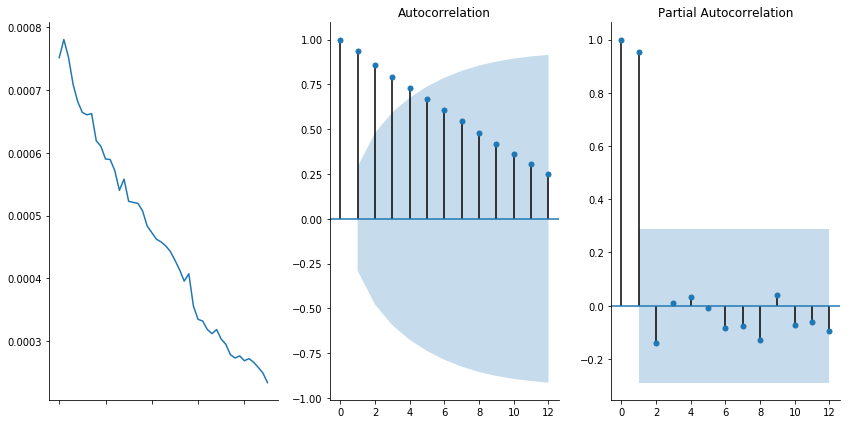

In [167]:
plots(df_ratios_train['Germany'], lags = 12)

In [182]:
fuller_test(df_ratios_train['Germany'])

ADF Statistic: -2.818320
p-value: 0.055704
Critical Values:
	1%: -3.589
	5%: -2.930
	10%: -2.603


In [227]:
def find_best_params(array):
    '''
    attempting to find the best
    '''
    
    
    # creating the  parameters as tuples
    p = d = q = range(0, 6)
    pdq = list(itertools.product(p, d, q))
#     print(pdq)
    results = {}
    for param in pdq:
        
        try:
#             print('hello')
            model = ARIMA(array ,order = param )
            fit = model.fit()
            results[str(param)] = fit.aic
#             print(fit.aic)
        except:
            continue
    return results

In [228]:
array = np.array(df_ratios_train['Germany'])
find_best_params(array)

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anacon

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


{'(0, 0, 0)': -670.719687301418,
 '(0, 0, 1)': -722.369481630081,
 '(0, 1, 0)': -866.9972634828316,
 '(0, 1, 1)': -867.4568075836017,
 '(0, 1, 2)': -865.6646615481873,
 '(0, 1, 3)': -863.1113220141907,
 '(0, 1, 4)': -861.5341380250002,
 '(0, 1, 5)': -859.4293772941613,
 '(0, 2, 0)': -811.660758626829,
 '(0, 2, 1)': -826.9718294927072,
 '(0, 2, 2)': -830.6655953356078,
 '(1, 0, 0)': -858.2722065963371,
 '(1, 0, 1)': -858.6188339283867,
 '(1, 0, 2)': -718.3848048085522,
 '(1, 0, 3)': -756.8178950304327,
 '(1, 0, 4)': -856.2950914615055,
 '(1, 1, 0)': -866.8717513123256,
 '(1, 1, 1)': -865.685324686348,
 '(1, 2, 0)': -823.0638335225924,
 '(1, 2, 1)': -835.6308489843043,
 '(1, 2, 2)': -834.9582799195007,
 '(1, 2, 3)': -834.4362432458606,
 '(1, 2, 5)': -831.5491563517,
 '(2, 0, 0)': -859.7766025681836,
 '(2, 1, 0)': -865.6623938709564,
 '(2, 1, 1)': -863.5315780928387,
 '(2, 1, 2)': -860.8113546404576,
 '(2, 2, 0)': -828.2618865777338,
 '(2, 2, 1)': -832.2542957938272,
 '(2, 2, 3)': -832.75

In [213]:
tupl = (1,3,4)

In [208]:
str(tupl)

'(1, 3, 4)'